In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
!kaggle datasets download -d burnoutminer/heights-and-weights-dataset

  0% 0.00/244k [00:00<?, ?B/s]
100% 244k/244k [00:00<00:00, 34.8MB/s]


In [3]:
import zipfile 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
file = zipfile.ZipFile('/content/heights-and-weights-dataset.zip')
file.extractall()
file.close()

In [5]:
df = pd.read_csv('/content/SOCR-HeightWeight.csv')
df.shape

(25000, 3)

In [6]:
df.sample(5)

,Index,Height(Inches),Weight(Pounds)
2756,2757,68.24827,109.1823
20990,20991,67.30146,143.8451
21496,21497,71.02270,140.9263
19949,19950,67.53817,121.8995
8367,8368,65.53734,118.2815


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


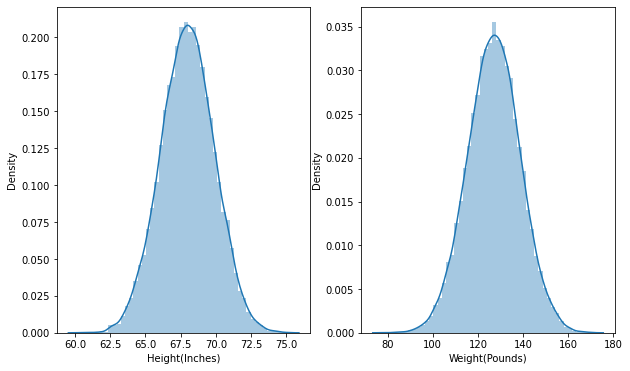

In [7]:
plt.subplots(1,2,figsize=(10,6))
plt.subplot(121)
sns.distplot(df['Height(Inches)'])
plt.subplot(122)
sns.distplot(df['Weight(Pounds)'])
plt.show()

### Check outliers using box plot

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


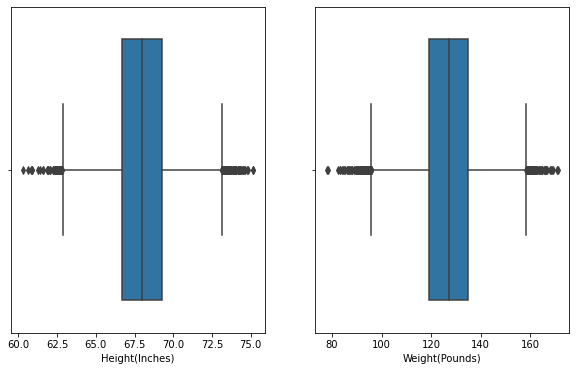

In [8]:
plt.subplots(1,2,figsize=(10,6))
plt.subplot(121)
sns.boxplot(df['Height(Inches)'])
plt.subplot(122)
sns.boxplot(df['Weight(Pounds)'])
plt.show()

In [9]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


### Outlier detection using z-score

In [10]:
df['z_score_ht'] = (df['Height(Inches)'] - df['Height(Inches)'].mean())/df['Height(Inches)'].std()

In [11]:
df.sample(5)

,Index,Height(Inches),Weight(Pounds),z_score_ht
7187,7188,68.30048,114.0233,0.161629
22642,22643,66.07250,113.1841,-1.009957
16356,16357,65.29847,110.1183,-1.416981
19525,19526,64.51039,109.5663,-1.831394
14809,14810,64.86518,114.7467,-1.644828


In [12]:
outliers = df[(df['z_score_ht'] > 3.0) | (df['z_score_ht'] < -3.0)]

In [13]:

df['Height(Inches)'].mean()
df['Height(Inches)'].std()
outliers.shape

(51, 4)

In [14]:
outliers.sample(5)

,Index,Height(Inches),Weight(Pounds),z_score_ht
3696,3697,61.89340,95.74545,-3.207542
2395,2396,73.99549,142.90160,3.156357
12031,12032,60.86977,108.86330,-3.745819
15209,15210,74.59993,147.03720,3.474202
19198,19199,61.82700,100.93910,-3.242458


In [16]:
### Treatment of outlier - trimming or capping

In [23]:
upper_limit = df['Height(Inches)'].mean()+3*df['Height(Inches)'].std()
lower_limit = df['Height(Inches)'].mean()-3*df['Height(Inches)'].std()

In [24]:
new_ht = np.where(df['z_score_ht']>3.0,upper_limit,
              np.where(df['z_score_ht']<-3.0,lower_limit,df['Height(Inches)']))

In [25]:
df['new_ht'] = new_ht

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


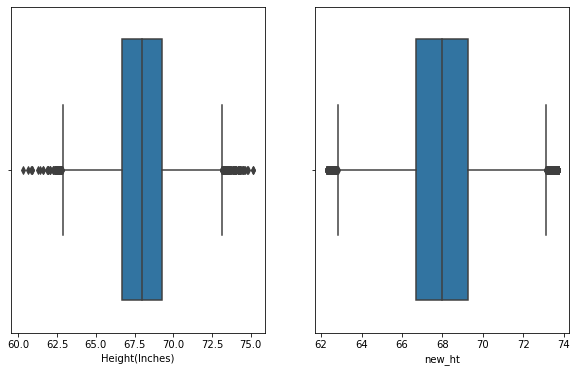

In [27]:
plt.subplots(1,2,figsize=(10,6))
plt.subplot(121)
sns.boxplot(df['Height(Inches)'])
plt.subplot(122)
sns.boxplot(df['new_ht'])
plt.show()

### Use Interquartile Range method to detect outliers in height

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_ht_iqr'>

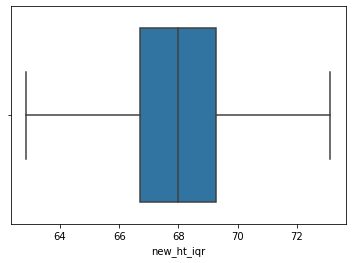

In [20]:
q1 = df['Height(Inches)'].quantile(0.25)
q3 = df['Height(Inches)'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR
#capping of outliers
df['new_ht_iqr'] = np.where(df['Height(Inches)']>upper_limit,upper_limit,
                            np.where(df['Height(Inches)']<lower_limit,lower_limit,df['Height(Inches)']))
sns.boxplot(df['new_ht_iqr'])

### Use percentile method to cap outliers - Winsorization

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_ht_percentile'>

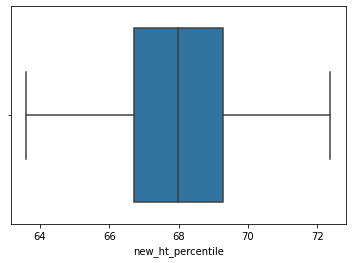

In [21]:
upper_limit = df['Height(Inches)'].quantile(0.99)
lower_limit = df['Height(Inches)'].quantile(0.01)
df['new_ht_percentile'] = np.where(df['Height(Inches)']>upper_limit,upper_limit,
                            np.where(df['Height(Inches)']<lower_limit,lower_limit,df['Height(Inches)']))
sns.boxplot(df['new_ht_percentile'])

In [22]:
upper_limit,lower_limit

(72.37221499999998, 63.5986493)